# PyAMPR Demonstration

This Notebook demonstrates some of the capabilitites of PyAMPR

Install pyampr via "python setup.py install" in the pyampr source directory. If you want to write out KML/KMZ files then you must install simplekml (https://code.google.com/p/simplekml/).

PyAMPR is an open-source, object-oriented Python framework for quickly and easily reading, processing, and visualizing AMPR data. It has been developed and tested at NASA Marshall Space Flight Center. Besides the aforementioned simplekml, PyAMPR utilizes the NumPy, matplotlib, Basemap, pylab, os, datetime, calendar, time, gzip, and codecs modules. PyAMPR is known to work with Python 2.7. 

One of the main components of PyAMPR is the AmprTb class. See below how, with this class, one can quickly read and store in memory an entire field project's worth of AMPR data, if desired. In my working directory, I have placed all the AMPR Level 1B data files from the MC3E field campaign in 2011. These data are available from http://ghrc.nsstc.nasa.gov/hydro/search.pl.

In [1]:
import sys
print(sys.version)

3.4.3 |Anaconda 2.3.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [2]:
########################################
#Example initialization of class AmprTb
########################################

import pyampr
import glob
import os
from mpl_toolkits.basemap import cm
%matplotlib inline

#We read in all AMPR data from MC3E and store as a dictionary of AmprTb classes.
print
print('Reading in all MC3E data and storing as dict of AmprTb classes')
print

#Change file & directory names as needed
files = sorted(glob.glob('/Users/tjlang/Documents/AMPR/MC3E/*.txt'))
print('Available files')
for file in files:
    print(file)

mc3e_data = {}

for ftitle in files:
    fname = os.path.basename(ftitle)
    fdate = fname[10:18]                           #String date format: YYYYMMDD
    if fdate == '20110524' or fdate == '20110420': #Remove this test to read in everything
        data = pyampr.AmprTb(ftitle, project='MC3E')      #Instantiate AmprTb class  
        mc3e_data[fdate] = data                    #Append to dictionary

#Output demonstration
print
print('Output Demo')
print('-----------')
#print all available dates
print
print('Available dates')
print(mc3e_data.keys())

Reading in all MC3E data and storing as dict of AmprTb classes
Available files
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110419_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110420_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110422_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110425_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110427_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110507_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110508_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110511_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110518_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110520_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110524_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110529_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110601_tbs_v01.txt
/Users/tjlang/Documents/AMPR/MC3E/mc3e_ampr_20110603_tbs_v01.txt

**********

OK, just what the heck is in these files? Lots of documentation, read it all!

In [3]:
help(mc3e_data['20110524'])

Help on AmprTb in module pyampr.pyampr object:

class AmprTb(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, full_path_and_filename=None, project='IPHEX')
 |      If passed a filename, call the read_ampr_tb_level2b() method,
 |      otherwise just instance the class with nothing
 |  
 |  calc_polarization(self, simple=False, force_match=True, chan_list=['10', '19', '37', '85'])
 |      *** THIS METHOD IS EXPERIMENTAL ***
 |      
 |      This method calculates H & V given the mixed-pol A & B channels.
 |      Solves Equation 1 in Vivekanandan et al. (1993) for Tb in H and V.
 |      Where A or B are not good will be populated with AmprTb.bad_data.
 |      If successful, TB10H, TB10V, TB19H, TB19V, TB37H, TB37V, TB85H, TB85V
 |      will now be attributes of the AmprTb instance. Missing channels will
 |      not be processed. Calculation performed via methodology of Brent Roberts.
 |      
 |      Creates attributes called TB##_offset, where ## is channel
 |      freq

The read_ampr_tb_level1b() method reads the ASCII files produced by Frank Lafontaine's old code for MC3E. NASA MSFC is producing a similar dataset for IPHEx in 2014. There is a ton of hard coding in this, making lots of assumptions about how the ASCII files will be arranged and what exactly is in them. It is tested and working on the MC3E files available from the GHRC DAAC, and it will work for IPHEx as well. Making PyAMPR compliant with older datasets is on the horizon. It will simply involve adding a separate read method for old formatted data, and perhaps some minor adjustments to other methods.

### Plotting Demonstration

Let's plot the track for the 85 GHz (A) channel from 5/24/11. This is a mixed-pol channel - it starts out pure V at the left edge of the swath, and changes over to pure H at the right edge (B channels do the opposite). We can save these images as a file if desired.


********************
plot_ampr_track():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
********************



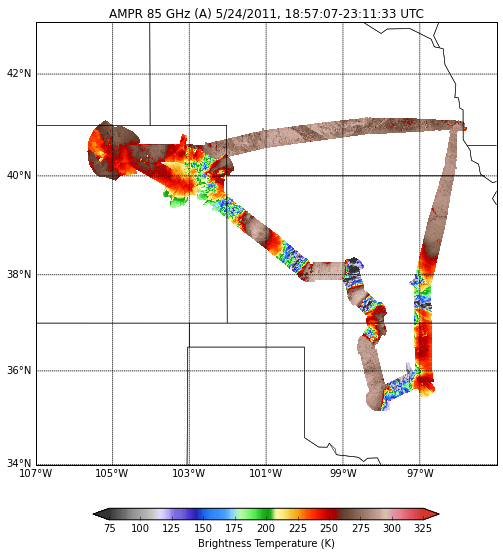

In [4]:
mc3e_data['20110524'].plot_ampr_track('85A', latrange=[34,43], lonrange=[-107,-95],
                                          save='ampr_track_85A_ll_34N_107W_ur_43N_95W.png')

plot_ampr_track() has multiple options. For instance, you can change the color map (along with min/max colors), you can show the ER2 track in black with maneuver times in white, and you can adjust the scan range (values outside the range of available scans will simply default to the scan limits).


********************
plot_ampr_track():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Scan number too small, using first scan for beginning
Best results are obtained when latrange ~ lonrange.
********************



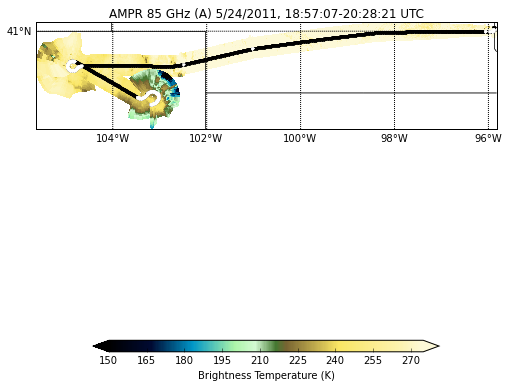

In [5]:
mc3e_data['20110524'].plot_ampr_track('85A', cmap=cm.GMT_relief, 
                                       show_track=True, scanrange=[0,2400], clevs=[150,275])

The default for plot_ampr_track() is to plot 10 GHz (A), use amprTB_cmap (in udf_cmap.py) for colors, and plot the whole track with limits defined by the data lat/lon range. Note in the following case how missing data show up as black. If you want to overplot other data, you can set return_flag=True to return figure, axis, Basemap, etc. variables for later adjustment.


********************
plot_ampr_track():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
********************



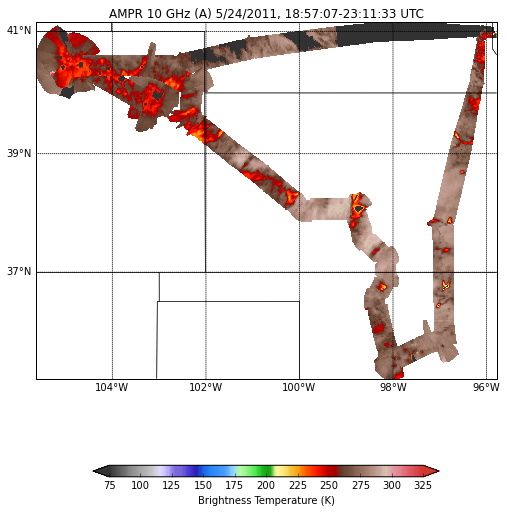

In [6]:
mc3e_data['20110524'].plot_ampr_track()

The other major plotting routine is the strip chart method, plot_ampr_channels(). Strip charts are great for seeing how the same cloud or surface feature appears differently to different microwave channel frequencies. They are also good for spotting data quality control issues. See an example below.


********************
plot_ampr_channels():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
********************



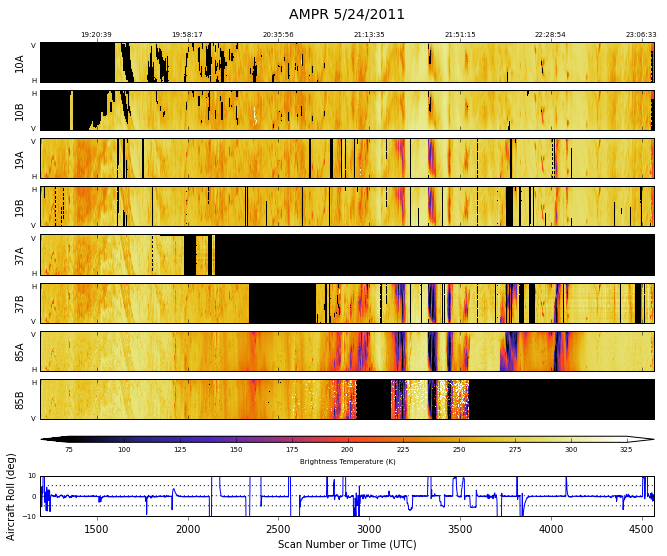

In [7]:
mc3e_data['20110524'].plot_ampr_channels(save='channels.png', cmap='CMRmap')

There are several options with this method. Probably the most important is the ability to adjust scan range. Note the text output, as in plot_ampr_track(), which lets you know what your scan options are. The timerange keyword can also be used instead of scanrange, to accomplish the same task.


********************
plot_ampr_channels():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Scan number too small, using first scan for beginning
********************



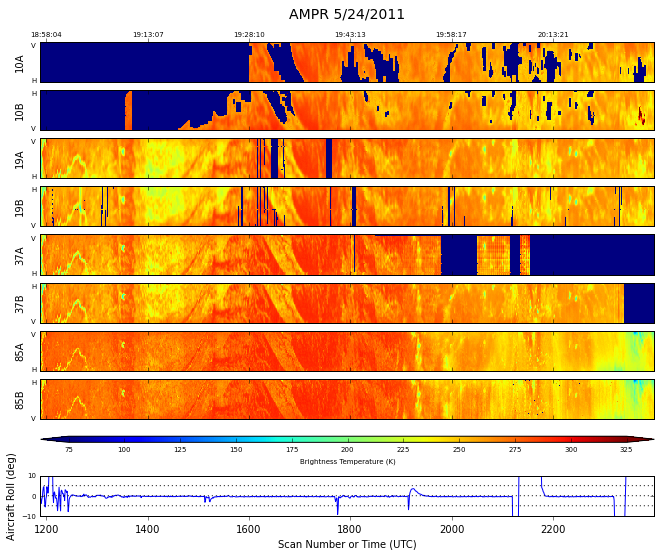

In [8]:
mc3e_data['20110524'].plot_ampr_channels(scanrange=[0, 2400], cmap='jet')

So let's focus on just a 1000-scan range from shortly after takeoff on this day.


********************
plot_ampr_channels():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
********************



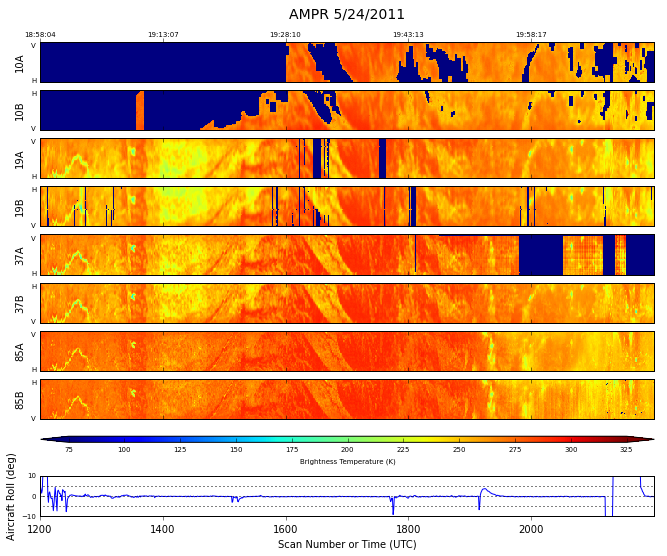

In [9]:
mc3e_data['20110524'].plot_ampr_channels(scanrange=[1200, 2200], cmap='jet')

### Polarization Deconvolution

We have the abiliy to deconvolve distinct H & V polarizations from the mixed-pol data. Here's an example for an overwater flight on 4/20/11.

In [10]:
mc3e_data['20110420'].calc_polarization()


********************
calc_polarization():
Calculating for 10 GHz channel
Calculating for 19 GHz channel
Calculating for 37 GHz channel
Calculating for 85 GHz channel
0.1405789852142334 seconds to calculate H & V
If successful, following attributes are now available:
TB10H TB10VTB19H TB19VTB37H TB37VTB85H TB85V
********************



Let's plot it up, see what we see. Note how I commit some typos with the channel name (lower case v) and the lonrange (out of order). PyAMPR can handle minor issues like that.


********************
plot_ampr_track():
Available scans = 247 to 2190
Available times = 16:58:02 - 19:24:22
********************



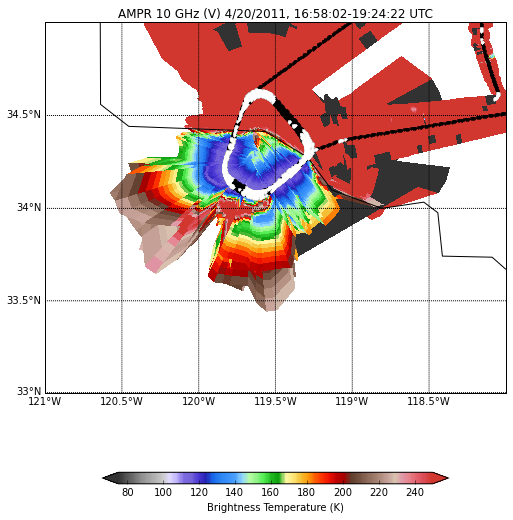

In [11]:
mc3e_data['20110420'].plot_ampr_track('10v', clevs=[75,250], show_track=True, 
                                          latrange=[33,35], lonrange=[-118,-121], 
                                          meridians=0.5, parallels=0.5)

The example is from a test flight off the Southern California coast. Land (including Catalina Island) shows up as high TBs (red/pink). The ER2 flew racetrack patterns this day, half over the ocean, half over land. The 10 GHz (V) channel shows increasing TBs off nadir over the ocean, as expected from theory, while the 10 GHz (H) channel (below) shows the opposite, again as expected.


********************
plot_ampr_track():
Available scans = 247 to 2190
Available times = 16:58:02 - 19:24:22
********************



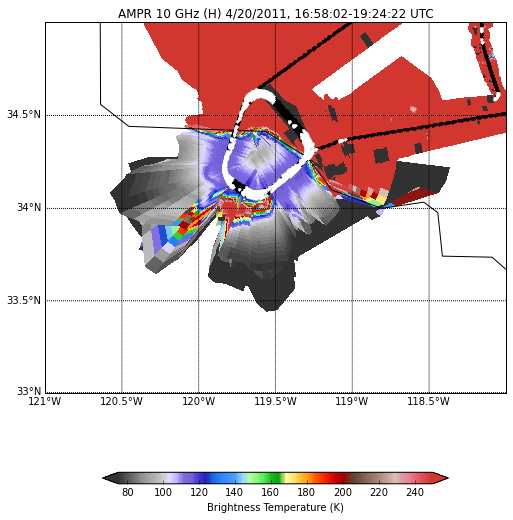

In [12]:
mc3e_data['20110420'].plot_ampr_track('10h', clevs=[75,250], show_track=True, 
                                          latrange=[35,33], lonrange=[-118,-121], 
                                          meridians=0.5, parallels=0.5)

Strip charts with H & V are also available, just set the show_pol keyword to True. If H & V are not yet calculated, plot_ampr_channels() will call calc_polarization() before plotting. Note that if either the A or B channel is missing data, both H and V cannot be calculated for that particular portion of the track. Thus, expect more missing data in the deconvolved channels (e.g., 37 GHz in the example below, where the 37A channel was down by this time of the flight).


********************
plot_ampr_channels():
Available scans = 247 to 2190
Available times = 16:58:02 - 19:24:22
********************



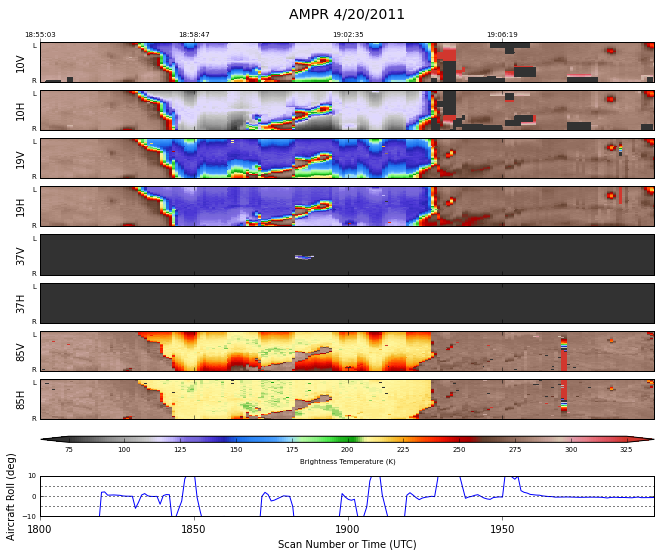

In [13]:
mc3e_data['20110420'].plot_ampr_channels(show_pol=True, scanrange=[1800,2000])

### Writing a Google Earth image

There is a method in PyAMPR for creating a KMZ file that contains track-based imagery. It requires the google_earth_tools.py package distributed with PyAMPR. The method is write_ampr_kmz(), which also requires you to install simplekml (https://pypi.python.org/pypi/simplekml/). This creates a pyplot.pcolormesh image very similar to plot_ampr_track().


********************
write_ampr_kmz():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Google Earth image hopefully written to: ampr_test.kmz
********************



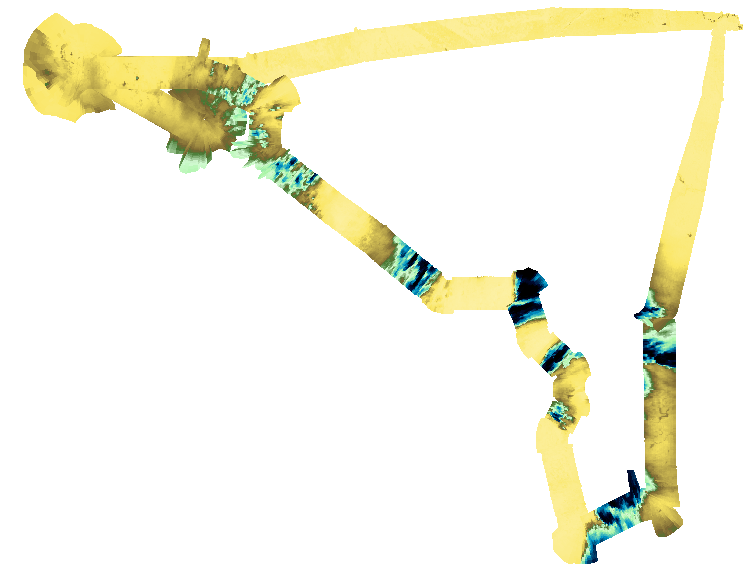

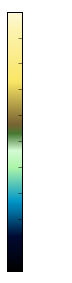

In [14]:
mc3e_data['20110524'].write_ampr_kmz('85a', file_name='ampr_test.kmz', cmap=cm.GMT_relief)

Kinda blank, huh? But go check out the kmz that was created. It will load in Google Earth and show the geolocated track imagery with a labeled colorbar anchored to the lower left. The temporary image files overlay.png and legend.png will be created in the working directory. They can be safely ignored or deleted (PyAMPR leaves them alone after creation, and overwrites them if this method is re-run).

If the legend is not desired, you can set the show_legend argument to False, like below. Also, if you don't specify a file or path name, it will write to the working directory a file called YYYYMMDD_TB###.kmz, where ### = channel. Look for something like that in your working directory after execution. We can also adjust the scan range plotted.


********************
write_ampr_kmz():
Available scans = 1187 to 4566
Available times = 18:57:07 - 23:11:33
Google Earth image hopefully written to: 20110524_202824z_TB85A.kmz
********************



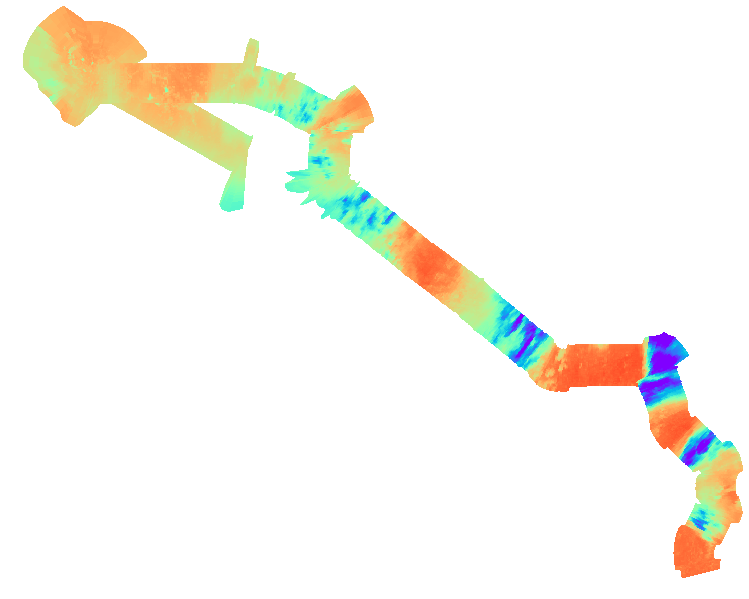

In [15]:
mc3e_data['20110524'].write_ampr_kmz(cmap='rainbow', show_legend=False, 
                                     scanrange=[2400, 3600], var='85a')

If you look at the help for this method, you will see that you can specify the scan range, contour levels, output directory, etc. as well. The write_ampr_kmz() method also allows you to limit the lat/lon range if desired.